## **Atp 2024 season analysis**


Main stats to do:


1-surface winrate for each player


2-

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
##reading the data
df = pd.read_csv('atp_matches_2024.csv')
df2 = pd.read_csv('atp_rankings_current.csv')
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92341 entries, 0 to 92340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ranking_date  92341 non-null  int64
 1   rank          92341 non-null  int64
 2   player        92341 non-null  int64
 3   points        92341 non-null  int64
dtypes: int64(4)
memory usage: 2.8 MB


In [11]:
Data_ = df.copy()

# Cleaning the data

In [39]:
Data_.info() ## checking non null info 

<class 'pandas.core.frame.DataFrame'>
Index: 3016 entries, 0 to 3075
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3016 non-null   object 
 1   tourney_name        3016 non-null   object 
 2   surface             3016 non-null   object 
 3   tourney_level       3016 non-null   object 
 4   tourney_date        3016 non-null   int64  
 5   winner_id           3016 non-null   int64  
 6   winner_name         3016 non-null   object 
 7   winner_ioc          3016 non-null   object 
 8   winner_age          3015 non-null   float64
 9   loser_id            3016 non-null   int64  
 10  loser_name          3016 non-null   object 
 11  loser_ioc           3016 non-null   object 
 12  loser_age           3015 non-null   float64
 13  score               3016 non-null   object 
 14  best_of             3016 non-null   int64  
 15  round               3016 non-null   object 
 16  minutes    

#Cleaning the data

In [13]:
##droping useless columns that will not be used 
Data_ = Data_.drop(columns=['match_num','draw_size','winner_seed','winner_entry','winner_hand','winner_ht',
                           'loser_seed','loser_entry','loser_hand','loser_ht'])

In [ ]:
Data_.info() ## making sure that i dropped the correct columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   tourney_level       3076 non-null   object 
 4   tourney_date        3076 non-null   int64  
 5   winner_id           3076 non-null   int64  
 6   winner_name         3076 non-null   object 
 7   winner_ioc          3076 non-null   object 
 8   winner_age          3075 non-null   float64
 9   loser_id            3076 non-null   int64  
 10  loser_name          3076 non-null   object 
 11  loser_ioc           3076 non-null   object 
 12  loser_age           3075 non-null   float64
 13  score               3076 non-null   object 
 14  best_of             3076 non-null   int64  
 15  round               3076 non-null   object 
 16  minute

In [14]:
##checking the nan data 
Data_.loc[Data_['w_df'].isna()]

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
12,2024-0339,Brisbane,Hard,A,20240101,111442,Jordan Thompson,AUS,29.7,200005,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,902.0,20.0,1765.0
116,2024-0301,Auckland,Hard,A,20240108,126214,Alejandro Tabilo,CHI,26.6,111815,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,707.0,19.0,1810.0
327,2024-0424,Dallas,Hard,A,20240205,105173,Adrian Mannarino,FRA,35.6,106415,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1920.0,83.0,695.0
677,2024-0404,Indian Wells Masters,Hard,M,20240304,208029,Holger Rune,DEN,20.8,105683,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3720.0,224.0,275.0
978,2024-0425,Barcelona,Clay,A,20240415,200221,Alejandro Davidovich Fokina,ESP,24.8,207830,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1395.0,50.0,988.0
1061,2024-1536,Madrid Masters,Clay,M,20240422,200000,Felix Auger Aliassime,CAN,23.7,206173,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,1240.0,2.0,8660.0
1259,2024-0322,Geneva,Clay,A,20240520,207686,Alexander Shevchenko,KAZ,23.4,200325,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,825.0,66.0,768.0
1279,2024-7694,Lyon,Clay,A,20240520,209260,Luciano Darderi,ITA,22.2,126239,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,1002.0,73.0,739.0
1286,2024-7694,Lyon,Clay,A,20240520,208659,Giovanni Mpetshi Perricard,FRA,20.8,106415,...,NaN,NaN,NaN,NaN,NaN,NaN,117.0,541.0,72.0,741.0
1305,2024-520,Roland Garros,Clay,G,20240527,134770,Casper Ruud,NOR,25.4,104925,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4425.0,1.0,9960.0


In [26]:
##decided to drop the nan since i cannot assume numbers for games already played but its data is lost
serve_cols = ['w_ace', 'l_ace', 'w_df', 'l_df']
Data_ = Data_.dropna(subset=serve_cols)


In [ ]:
Data_.isna().sum()

tourney_id              0
tourney_name            0
surface                 0
tourney_level           0
tourney_date            0
winner_id               0
winner_name             0
winner_ioc              0
winner_age              1
loser_id                0
loser_name              0
loser_ioc               0
loser_age               1
score                   0
best_of                 0
round                   0
minutes               189
w_ace                   0
w_df                    0
w_svpt                  0
w_1stIn                 0
w_1stWon                0
w_2ndWon                0
w_SvGms                 1
w_bpSaved               0
w_bpFaced               0
l_ace                   0
l_df                    0
l_svpt                  0
l_1stIn                 0
l_1stWon                0
l_2ndWon                0
l_SvGms                 1
l_bpSaved               0
l_bpFaced               0
winner_rank            17
winner_rank_points     17
loser_rank             38
loser_rank_p

## Transforming Data

## Getting statistics out of data

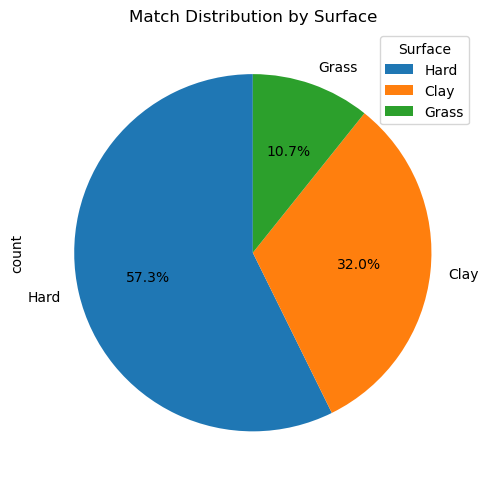

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

Data_['surface'].value_counts().plot(
    kind='pie', # type of visulization
    autopct='%1.1f%%',      # show percentages
    startangle=90         # better orientation
)
ax.set_title('Match Distribution by Surface')
plt.legend(
    title='Surface',
    loc='best' # location of the legend
)
plt.tight_layout()
plt.show()

In [38]:
# average time for matches for the whole season
avg_time= df['minutes'].mean()
print(f'Average time for matches for the whole season across all tournments is {int(avg_time)}.')


Average time for matches for the whole season across all tournments is 115.


In [32]:
types = {
    'Masters<=500': int(Data_.loc[Data_['tourney_level'] == 'A', 'minutes'].mean()),
    'Masters_1000': int(Data_.loc[Data_['tourney_level'] == 'M', 'minutes'].mean()),
    'Grand_slam': int(Data_.loc[Data_['tourney_level'] == 'G', 'minutes'].mean()),
    'Davis_cup': int(Data_.loc[Data_['tourney_level'] == 'D', 'minutes'].mean()),
    # 'O': Data_.loc[Data_['tourney_level'] == 'O', 'minutes'].mean(),
    'Tour_finals': int(Data_.loc[Data_['tourney_level'] == 'F', 'minutes'].mean()),
}

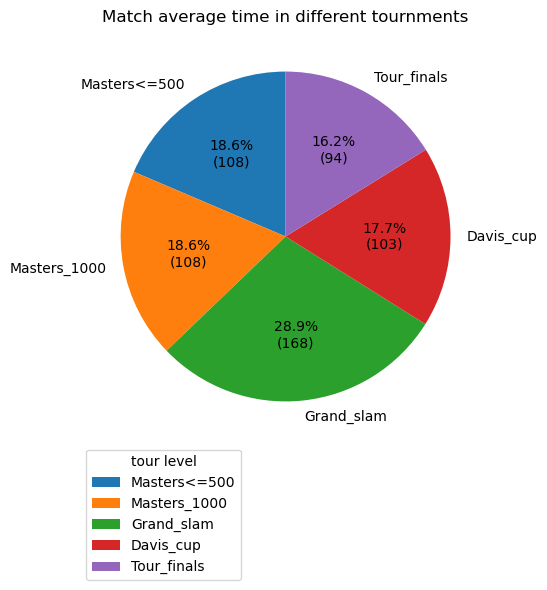

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    types.values(),
    labels = types.keys(),
    autopct=lambda p: f'{p:.1f}%\n({p*sum(types.values())/100:.0f})',# show percentages using lambda method "googled it"
    startangle=90         # better orientation
)
ax.set_title('Match average time in different tournments')
plt.legend(
    title='tour level',
    loc='upper left', # location of the legend
    bbox_to_anchor=(0, 0),# location of the legend
)
plt.tight_layout()
plt.show()

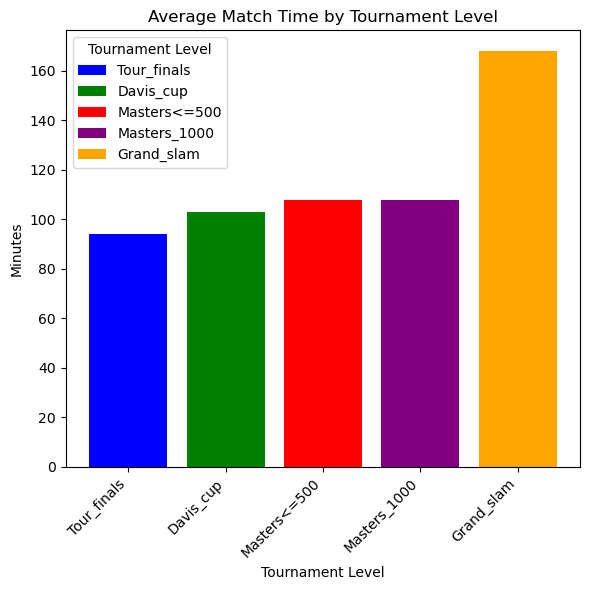

In [33]:
types_sorted = dict(sorted(types.items(), key=lambda x: x[1])) ## sorting the keys for dictionary
colors = ['blue', 'green', 'red', 'purple', 'orange'] # choosing the colors for the displays 
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    types_sorted.keys(),
    types_sorted.values(),
    color=colors
)

ax.legend(
    bars,
    types_sorted.keys(),
    title='Tournament Level',
    loc='upper left'
)

ax.set_title('Average Match Time by Tournament Level')
ax.set_ylabel('Minutes')
ax.set_xlabel('Tournament Level')
plt.xticks(rotation=45, ha='right') #fixing the gaps between the bars for better attirbute visualization
plt.tight_layout()


plt.show()
